<a href="https://colab.research.google.com/github/rachelebuchanan/steamanalysis/blob/main/CODE_ITEC6740_SA_FINALP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Sentiment Analysis*  
ITEC 6740 Group 4

In [ ]:
## READ IN DATA
## NLTK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
## DATA READ
df = pd.read_csv('games.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(1512, 14)
(500, 14)


In [ ]:
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


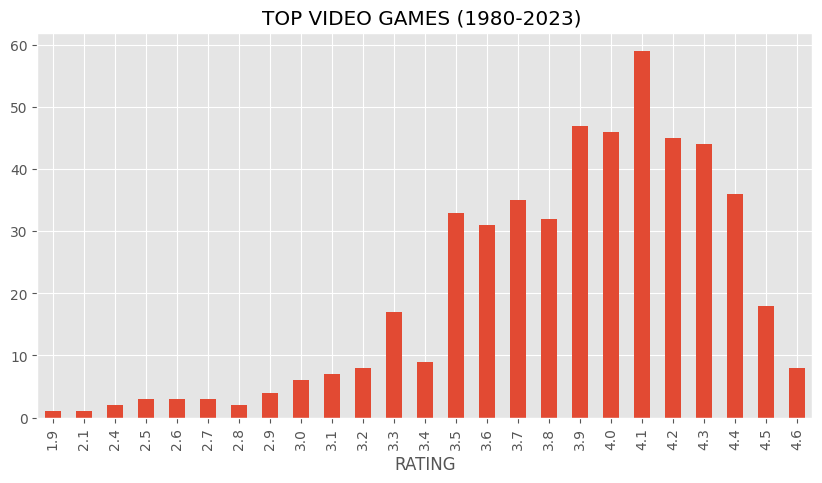

In [ ]:
## EDA
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='TOP VIDEO GAMES (1980-2023) ',
          figsize=(10, 5))
ax.set_xlabel('RATING')
plt.show()

In [ ]:
## NLTK
example = df['Reviews'][50]
print(example)

["You know a game is THAT good when even the tank controls don't suck, a masterpiece in nearly every way imaginable.", 'fuck tha puzzles man!', 'Peak atmosphere let down HEAVILY by gameplay that’s way too easy and lets down the incredible tension built by the writing, environments and sound design - if Bloober were competent they’d just copy and paste the entire game and increase enemy movement speed and reduce ammo by 20% or something like that', "If I hadn't learned the plot twist, I would have given a 5.", 'unmatched survival horror experience. amazing plot twist, tense atmosphere, godly soundtrack and characters that you care about.', 'the best game ever made, that other games will forever try to live up to and fail.']


In [ ]:
 import nltk
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
## VADER SENTIMENT SCORING
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.134, 'neu': 0.686, 'pos': 0.18, 'compound': 0.7785}

In [ ]:
## RUN POLARITY SCORE ON ENTIRE DATASET
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['Unnamed: 0']
## MISSING / INVALID DATA
    if isinstance(text, str):
        res[myid] = sia.polarity_scores(text)
    else:
        res[myid] = {'neg': None, 'neu': None, 'pos': None, 'compound': None}

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Unnamed: 0'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Unnamed: 0,neg,neu,pos,compound,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,0.063,0.610,0.327,0.9979,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,0.066,0.754,0.181,0.9934,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,0.066,0.834,0.100,0.9408,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,0.014,0.762,0.224,0.9859,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,0.046,0.775,0.179,0.9944,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


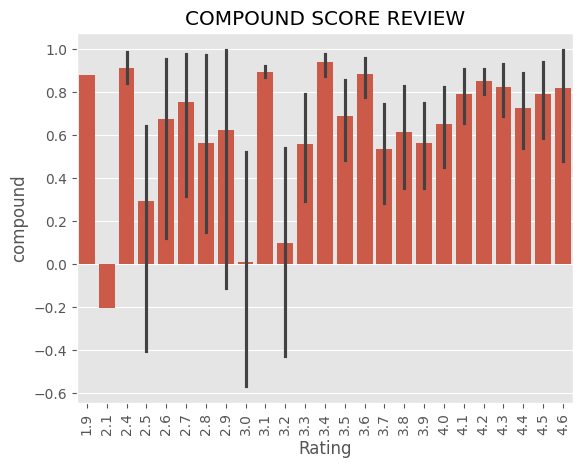

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('COMPOUND SCORE REVIEW')
plt.xticks(rotation=90)
plt.show()

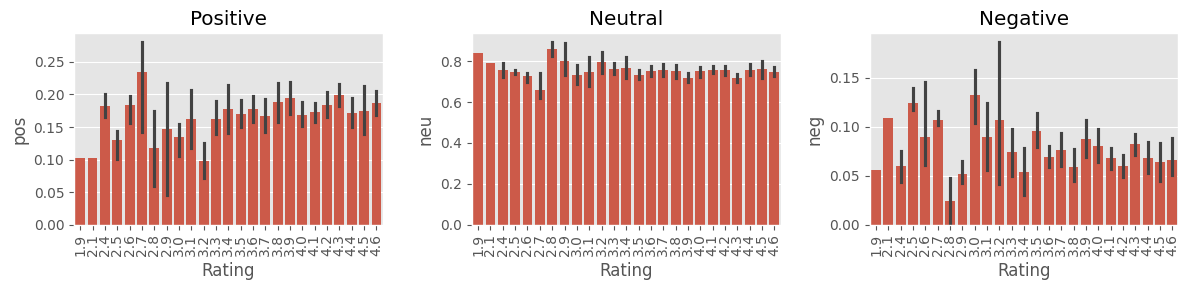

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
axs[0].set_title('Positive')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for the first subplot

sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
axs[1].set_title('Neutral')
axs[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for the second subplot

sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[2].set_title('Negative')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
## ROBERTA PRETRAINED MODEL
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# VADER EX RESULTS
print(example)
sia.polarity_scores(example)

["You know a game is THAT good when even the tank controls don't suck, a masterpiece in nearly every way imaginable.", 'fuck tha puzzles man!', 'Peak atmosphere let down HEAVILY by gameplay that’s way too easy and lets down the incredible tension built by the writing, environments and sound design - if Bloober were competent they’d just copy and paste the entire game and increase enemy movement speed and reduce ammo by 20% or something like that', "If I hadn't learned the plot twist, I would have given a 5.", 'unmatched survival horror experience. amazing plot twist, tense atmosphere, godly soundtrack and characters that you care about.', 'the best game ever made, that other games will forever try to live up to and fail.']


{'neg': 0.134, 'neu': 0.686, 'pos': 0.18, 'compound': 0.7785}

In [ ]:
## RUN ROBERTA MODEL
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.34020337, 'roberta_neu': 0.32517666, 'roberta_pos': 0.33461994}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
!pip install transformers
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

def polarity_scores_roberta(example, tokenizer, model):
    encoded_text = tokenizer(example, return_tensors='pt', truncation=True, max_length=512) # Added truncation and max_length
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        myid = row['Rating']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        # Pass tokenizer and model to polarity_scores_roberta
        roberta_result = polarity_scores_roberta(text, tokenizer, model)

        both = {**vader_result_rename, **roberta_result, 'Rating': myid}
        res[i] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'Unnamed: 0': 'Id'})
results_df = results_df.merge(df, how='left')

NameError: name 'res' is not defined

In [ ]:
results_df.columns


Index(['index', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Rating', 'Unnamed: 0',
       'Title', 'Release Date', 'Team', 'Times Listed', 'Number of Reviews',
       'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs',
       'Wishlist'],
      dtype='object')

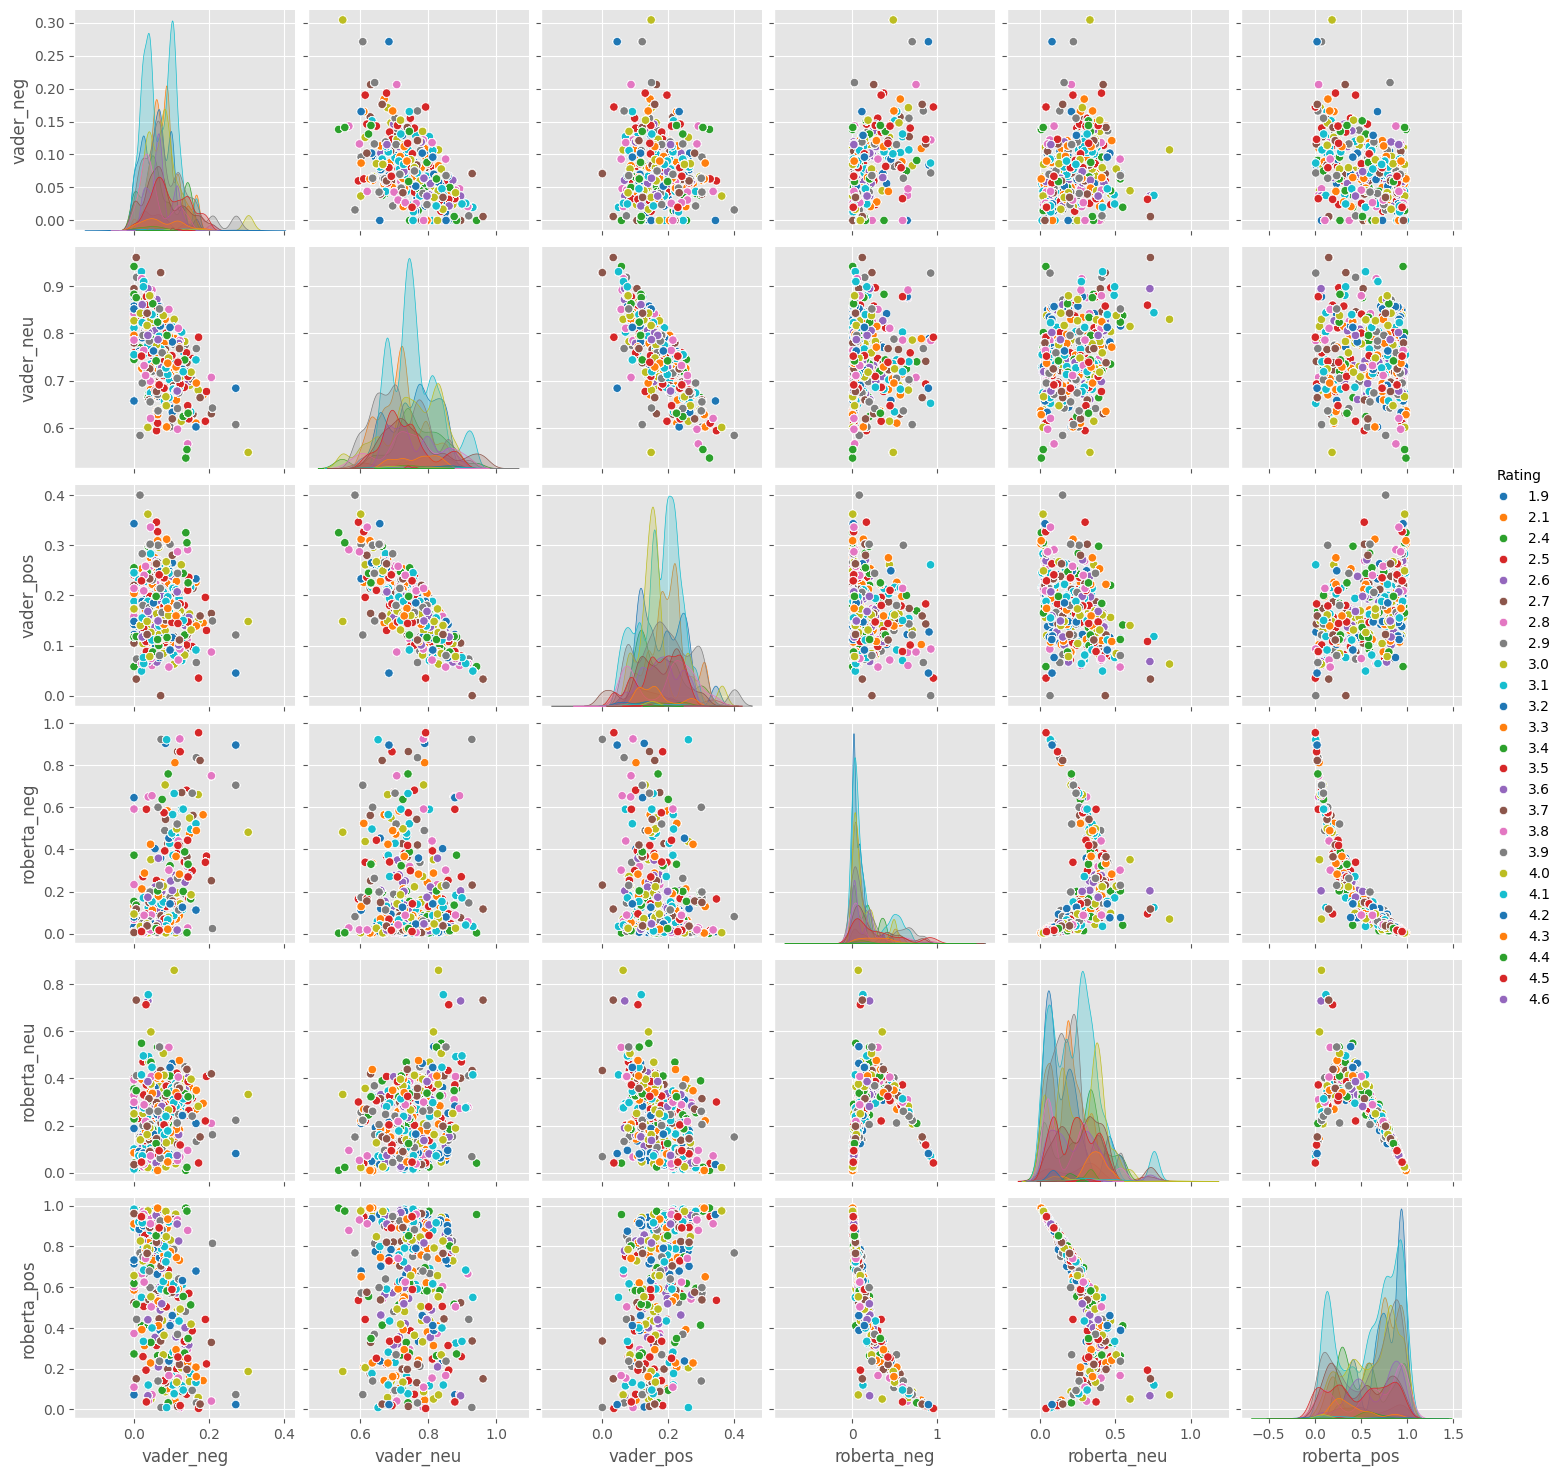

In [ ]:
## COMBINE AND COMPARE
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [ ]:
results_df.columns


Index(['index', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Rating', 'Unnamed: 0',
       'Title', 'Release Date', 'Team', 'Times Listed', 'Number of Reviews',
       'Genres', 'Summary', 'Reviews', 'Plays', 'Playing', 'Backlogs',
       'Wishlist'],
      dtype='object')

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]